이 부분은 제작된 tensorflow model인 h5를 typescripts에 적용하기 위해 만든 코드 섹션

현재 모델이 잘 작동하는 것을 확인

In [12]:
cd /home/juhwan/Documents/capstone/body_part_measurement/

/home/juhwan/Documents/capstone/body_part_measurement


In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import sys
sys.path.append("..")
from train import BodyPartsMeasurementTrainer
from body_parts_measurement_data_generator import BodyPartsMeasurementDataGenerator
import tensorflow as tf
from evaluator import Evaluator
from model.model import get_model
from tqdm import tqdm

In [30]:
print("python version: ", sys.version)
print("tensorflow version: ", tf.__version__)

python version:  3.9.6 (default, Mar 29 2024, 10:51:09) 
[Clang 15.0.0 (clang-1500.3.9.4)]
tensorflow version:  2.13.0


In [31]:
config = {
    # model
    'input_shape': [256,256,3],     # 훈련 이미지 크기
    'batch_size': 4,                # 배치 사이즈
    'path_pretrained': None,        # pretrained 모델 경로
    'type_backbone': "blazepose",   # backbone type (blazepose, mobilenet_v3)
    
    # loss
    'type_loss_fn': 'wing',         # 손실 함수 설정 (wing, mae)
    
    # data
    'seg_shape': [64,64],           # segmentation 크기 *미사용
    'path_classes': "../seg_classes.txt",   # segmentation class 정보 *미사용
    'shuffle': True,                # 데이터 섞기
    'is_normalized': False,         # normalize 데이터
    'is_with_seg': False,           # segmentation 사용 여부 *미사용
    # 'path_dataset': "/home/juhwan/Documents/capstone/body_part_measurement/dataset/korean_body", # 데이터 경로
    ## attention type              
    'type_attention': "regression", # attention 종류 (regression, categorical, none)
    'num_category_bmi': 10,         # categorical 시의 bmi category 개수 변수
    'num_category_height': 10,      # categorical 시의 height category 개수 변수
    'has_filename': False,          # 파일 이름이 주어지는지 여부

    # train
    'epochs': 30,                   # 훈련 epoch 수
    'eval_term': 1                  # 평가 빈도
}

In [32]:
model = get_model(config)

In [33]:
model.load_weights("best.h5")

내 이미지 가져와서 LOAD된 모델에 적용

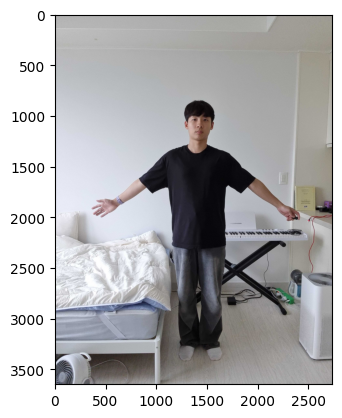

In [34]:
# 여기에 내 데이터 가져오기
from PIL import Image

test_img = Image.open('./test_img.jpg')
image_array = np.array(test_img)

# 이미지를 표시
plt.imshow(image_array)
plt.show()

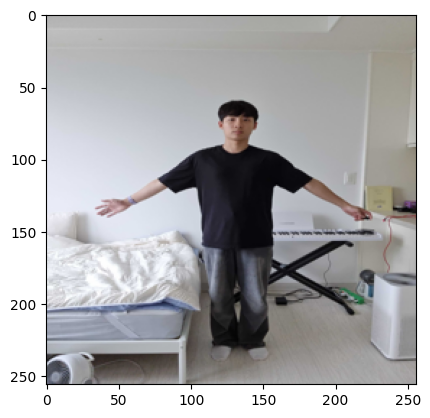

(256, 256, 3)

In [35]:
# 내 이미지 256x256으로 resize
image_array = np.array(test_img.resize((256,256)))
plt.imshow(image_array)
plt.show()
image_array = image_array/255
image_array.shape

In [36]:
image_batch = np.expand_dims(image_array, axis=0)  # (1, 256, 256, 3)
real_data_batch = np.expand_dims(np.array([170.3, 23.18]), axis=0)  # (1, 2)
print(image_batch.shape)
print(real_data_batch.shape)

(1, 256, 256, 3)
(1, 2)


In [37]:
image_batch_4 = np.tile(image_batch, (4, 1, 1, 1))  # (4, 256, 256, 3)
real_data_batch_4 = np.tile(real_data_batch, (4, 1))  # (4, 2)
print(image_batch_4.shape)
print(real_data_batch_4.shape)

(4, 256, 256, 3)
(4, 2)


In [38]:
result = model.predict([image_batch_4, real_data_batch_4])

1/1 [==============================] - 1s 814ms/step


In [39]:
result[0]

array([142.1733   ,  80.84915  , 124.438324 , 102.61467  ,  73.633194 ,
        42.542274 ,  58.630394 ,  32.409756 ,  94.302826 ,  78.943794 ,
        85.899605 ,  97.754005 ,  56.806454 ,  36.281593 ,  37.06654  ,
        22.165339 ,  25.236496 ,  29.072422 ,  23.924355 ,  16.52588  ,
        31.484095 ,  56.183437 ,  35.382786 ,  21.305416 ,  11.73216  ,
        24.883642 ,  10.2602415,  13.325438 ,  18.45938  ,  10.639191 ,
         8.4588585], dtype=float32)